# MCE and Friends

Project steps:


1.   Data exploration


*   Plot features
*   Remove hashed features
*   Organize data matrix
*   Calculate prevalence rate
*   Training size vs. test size







2. Data processing and building training/validation/test sets


*   Validation and test sets are typically the same size
*   Shuffle dataset
*   Check that the prevalence in each set is similar to the original, otherwise consider subsampling or oversampling
*   Normalize/scale variables if needed
*   Assign data location cluster ID based on K-means clustering of lat/long data
      *   Multiple K-means outputs (different number of k clusters)



3. Try different classification models

*   Random Forest
*   Decision trees
*   Gradient boosting
*   Logistic regression
*   Neural net
      *   Batch normalization
*   Ensemble selection
*   Want a probability outcome



4. Model selection and validation


*   Learning curves
*   Bias-variance tradeoff



5. Hyperparameter tuning


*   Random grid search (Look into using a package)



In [ ]:
# Import libraries here
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Upload data as pandas df's
!wget https://github.com/lakiAgigar/Caltech-CS155-2021/raw/main/projects/project1/WILDFIRES_TEST.zip
!wget https://github.com/lakigigar/Caltech-CS155-2021/raw/main/projects/project1/WILDFIRES_TRAIN.zip

!unzip WILDFIRES_TEST.zip
!unzip WILDFIRES_TRAIN.zip

train_df = pd.read_csv('WILDFIRES_TRAIN.csv', index_col='id')
test_df = pd.read_csv('WILDFIRES_TEST.csv', index_col='id')

--2021-02-07 03:28:16--  https://github.com/lakiAgigar/Caltech-CS155-2021/raw/main/projects/project1/WILDFIRES_TEST.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-02-07 03:28:16 ERROR 404: Not Found.

--2021-02-07 03:28:16--  https://github.com/lakigigar/Caltech-CS155-2021/raw/main/projects/project1/WILDFIRES_TRAIN.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project1/WILDFIRES_TRAIN.zip [following]
--2021-02-07 03:28:16--  https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project1/WILDFIRES_TRAIN.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133,

In [ ]:
# What the training data looks like
train_df

In [ ]:
# What the testing data looks like
test_df

In [ ]:
# How to access a particular feature from the df's
test_df['LATITUDE']

In [ ]:
# Divide training set into validation sets
print("Ratio of training set size to testing set size: ", len(train_df)/len(test_df))
num_sets = 4
interval = int(len(train_df)/num_sets)

train_df_shufd = train_df.sample(frac = 1) 

sets = []
for i in range(num_sets):
  if i != num_sets-1:
    sets.append(train_df_shufd[i*interval:(i+1)*interval].copy())
  else: sets.append(train_df_shufd[i*interval:])

In [ ]:
# Font size for plots
ft_size = 30

In [ ]:
# Prevalence Rates for Latitude
feature = 'LATITUDE'
nbins = 50

fig, axs = plt.subplots(num_sets+1, figsize=(20,20))

bins = np.linspace(int(min(train_df[feature])), int(max(train_df[feature])+1))

axs[0].hist(train_df[feature], bins = bins, color='midnightblue')
for i in range(num_sets):
  axs[i+1].hist(sets[i][feature], bins = bins, color='midnightblue')

plt.xlabel(feature)

plt.rc('font', size=ft_size)
plt.tight_layout()
plt.show()

In [ ]:
#@title
# Prevalence Rates for Latitude
feature = 'LONGITUDE'
nbins = 50

fig, axs = plt.subplots(num_sets+1, figsize=(20,20))

bins = np.linspace(int(min(train_df[feature])), int(max(train_df[feature])+1))

axs[0].hist(train_df[feature], bins = bins, color='midnightblue')
for i in range(num_sets):
  axs[i+1].hist(sets[i][feature], bins = bins, color='midnightblue')

plt.xlabel(feature)

plt.rc('font', size=ft_size)
plt.tight_layout()
plt.show()

In [ ]:
#@title
# Prevalence Rates for Latitude
feature = 'DISCOVERY_TIME'
nbins = 50

fig, axs = plt.subplots(num_sets+1, figsize=(20,20))

bins = np.linspace(int(min(train_df[feature])), int(max(train_df[feature])+1))

axs[0].hist(train_df[feature], bins = bins, color='midnightblue')
for i in range(num_sets):
  axs[i+1].hist(sets[i][feature], bins = bins, color='midnightblue')

plt.xlabel(feature)

plt.rc('font', size=ft_size)
plt.tight_layout()
plt.show()

In [ ]:
#@title
# Prevalence Rates for Latitude
feature = 'FIRE_SIZE'
nbins = 50

fig, axs = plt.subplots(num_sets+1, figsize=(20,20))

bins = np.linspace(0, 1)

axs[0].hist(train_df[feature], bins = bins, color='midnightblue')
for i in range(num_sets):
  axs[i+1].hist(sets[i][feature], bins = bins, color='midnightblue')

plt.xlabel(feature)

plt.rc('font', size=ft_size)
plt.tight_layout()
plt.show()

In [ ]:
#@title
# Prevalence Rates for Latitude
feature = 'FIPS_CODE'
nbins = 50

fig, axs = plt.subplots(num_sets+1, figsize=(20,20))

bins = np.linspace(int(min(train_df[feature][np.where(~np.isnan(train_df[feature]))[0]])), \
                                               int(max(train_df[feature][np.where(~np.isnan(train_df[feature]))[0]])))

axs[0].hist(train_df[feature], bins = bins, color='midnightblue')
for i in range(num_sets):
  axs[i+1].hist(sets[i][feature], bins = bins, color='midnightblue')

plt.xlabel(feature)

plt.rc('font', size=ft_size)
plt.tight_layout()
plt.show()

In [ ]:
#@title
# Prevalance by Month
fig, axs = plt.subplots(num_sets+1, figsize=(20,20))

to_plot = np.array(train_df["DATE"].groupby(train_df["DATE"].dt.month).count())
axs[0].bar(range(1,len(to_plot)+1), to_plot)

for i in range(num_sets):
  to_plot = np.array(sets[i]["DATE"].groupby(sets[i]["DATE"].dt.month).count())
  axs[i+1].bar(range(1,len(to_plot)+1), to_plot)

plt.xlabel("Month")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Year')

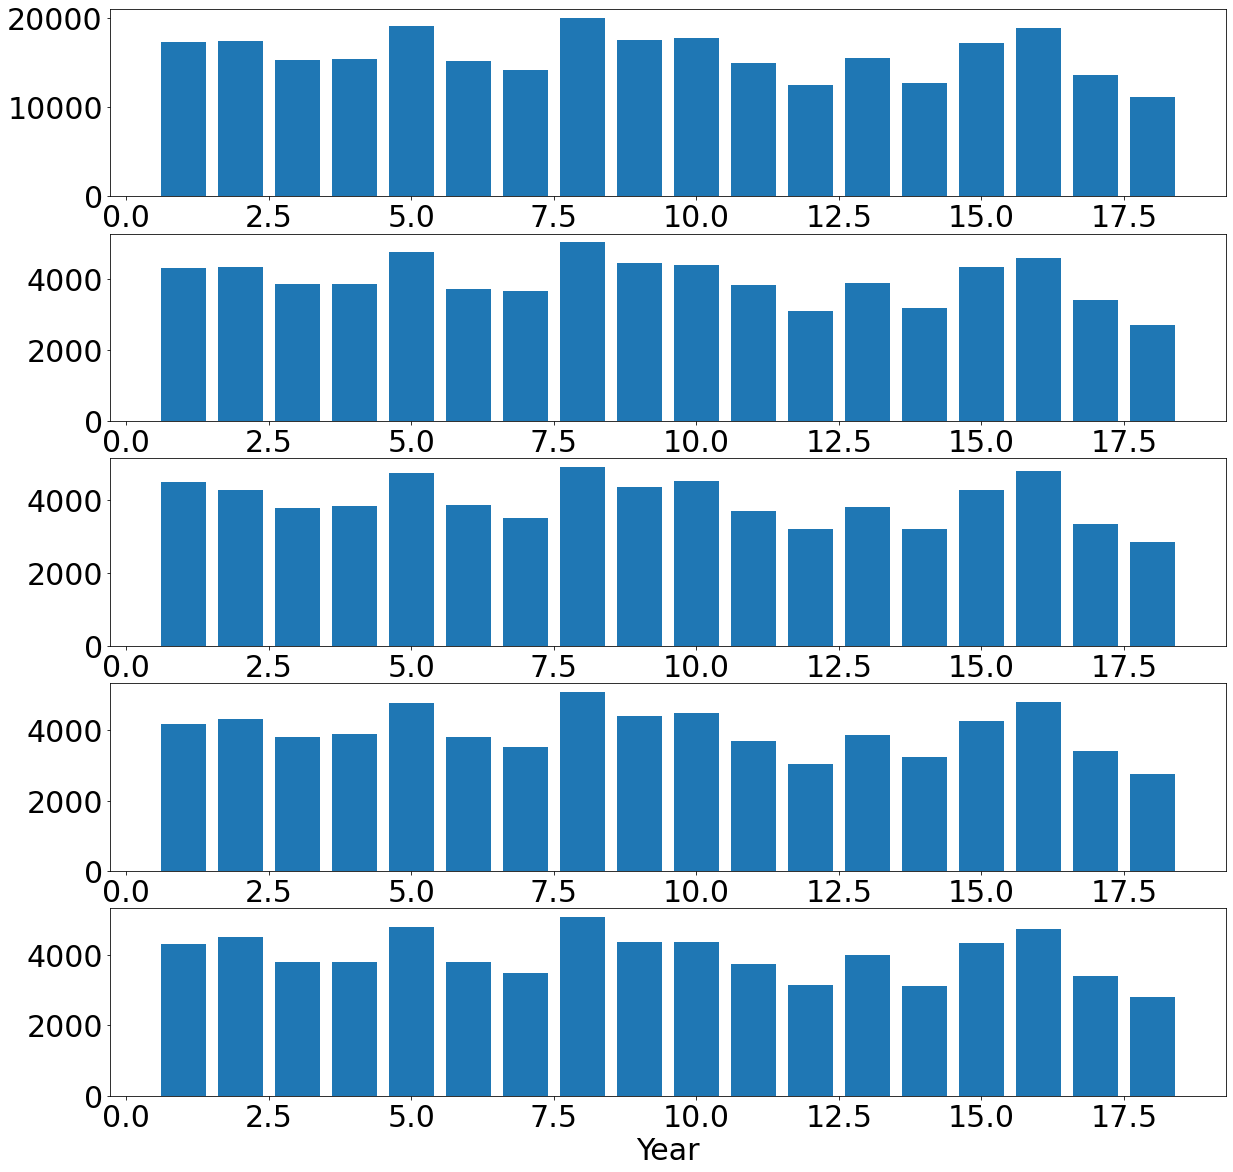

In [ ]:
#@title
# Prevalance by Year
fig, axs = plt.subplots(num_sets+1, figsize=(20,20))

train_df["DATE"] = train_df["DATE"].astype("datetime64")
to_plot = np.array(train_df["DATE"].groupby(train_df["DATE"].dt.year).count())
axs[0].bar(range(1,len(to_plot)+1), to_plot)

for i in range(num_sets):
  sets[i]["DATE"] = train_df["DATE"].astype("datetime64")
  to_plot = np.array(sets[i]["DATE"].groupby(sets[i]["DATE"].dt.year).count())
  axs[i+1].bar(range(1,len(to_plot)+1), to_plot)

plt.xlabel("Year")

In [ ]:
#@title
# Prevalance by Day
fig, axs = plt.subplots(num_sets+1, figsize=(20,20))

to_plot = np.array(train_df["DATE"].groupby(train_df["DATE"].dt.day).count())
axs[0].bar(range(1,len(to_plot)+1), to_plot)

for i in range(num_sets):
  to_plot = np.array(sets[i]["DATE"].groupby(sets[i]["DATE"].dt.day).count())
  axs[i+1].bar(range(1,len(to_plot)+1), to_plot)

plt.xlabel("Day")

In [ ]:
#@title
feature = 'STATE'

# Prevalance by State
fig, axs = plt.subplots(num_sets+1, figsize=(20,20))
train_df[feature].value_counts().plot(kind='bar', ax=axs[0])

for i in range(num_sets):
  sets[i][feature].value_counts().plot(kind='bar', ax=axs[i+1])

plt.xlabel(feature)

plt.tight_layout()
plt.show()  

In [ ]:
#@title
feature = 'FIPS_NAME'

# Prevalance by FIPS_NAME
fig, axs = plt.subplots(num_sets+1, figsize=(100,100))
train_df[feature].value_counts().plot(kind='bar', ax=axs[0])

for i in range(num_sets):
  sets[i][feature].value_counts().plot(kind='bar', ax=axs[i+1])

plt.xlabel(feature)

plt.tight_layout()
plt.show()  

In [ ]:
#@title
feature = "SOURCE_REPORTING_UNIT_NAME"

# Prevalance by SOURCE_REPORTING_UNIT_NAME
fig, axs = plt.subplots(num_sets+1, figsize=(100,100))
train_df[feature].value_counts().plot(kind='bar', ax=axs[0])

for i in range(num_sets):
  sets[i][feature].value_counts().plot(kind='bar', ax=axs[i+1])

plt.xlabel(feature)

plt.tight_layout()
plt.show()  

In [ ]:
def dateTransform(data):
    """
    This function transforms the date feature to a two arrays year and day of year,
    taking into account leap years to produce a day from 1-366.
    
    Inputs:
        data: either a training or test data pandas dictionaries
    Output:
        year: (N, ) vector of years
        dayofyr: (N, ) vector of days of the year ranging from 1 to 366
    """
    year= np.array(data["DATE"].dt.year)
    d = np.array(data["DATE"].dt.day)
    mo = np.array(data["DATE"].dt.month)
    daysinmos = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    daysinmos2 = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    dayofyr = np.copy(d)
    for i in range(len(year)):
      if mo[i]!=1:  
        if year[i]%4==0:
          dayofyr[i]=np.sum(daysinmos2[0:(mo[i]-1)])+d[i]
        else:
          dayofyr[i]=np.sum(daysinmos[0:(mo[i]-1)])+d[i]
    return year, dayofyr
        

In [ ]:
#@title
#Test dateTransform function --- works
year= np.array([2004, 2004, 2005, 2021])
d = np.array([2, 3, 3, 30])
mo = np.array([1, 3, 3, 4])
daysinmos = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
daysinmos2 = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayofyr = np.copy(d)
for i in range(len(year)):
  if mo[i]!=1:  
    if year[i]%4==0:
       dayofyr[i]=np.sum(daysinmos2[0:(mo[i]-1)])+d[i]
    else:
      dayofyr[i]=np.sum(daysinmos[0:(mo[i]-1)])+d[i]
print(year)
print(dayofyr)

[2004 2004 2005 2021]
[  2  63  62 120]


In [ ]:
#Transform date data
test_year, test_dayofyr = dateTransform(test_df)
train_year, train_dayofyr = dateTransform(train_df)
